In [29]:
import os 
import pandas as pd
#import gmaps
import requests
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import linregress

# from config import gkey

In [30]:
file = "Road_Crashes_for_five_Years_-_Victoria/Road_Crashes_for_five_Years_-_Victoria.csv"

main_df = pd.read_csv(file)
main_df.head()


,X,Y,objectid,accident_no,abs_code,accident_status,accident_date,date_value,Daily_Rainfall,accident_time,...,deg_urban_all,lga_name_all,region_name_all,srns,srns_all,rma,rma_all,divided,divided_all,stat_div_name
0,2498217.170,2454870.252,1,T20140013514,ABS to receive accident,Unfinished,1/7/2014,41821,0.6,13:09:00,...,TOWNS,MITCHELL,NORTHERN REGION,B,B,Arterial Highway,"Local Road,Arterial Highway",Undivided,Undivided,Country
1,2502934.960,2423005.289,2,T20140013549,ABS to receive accident,Finished,2/7/2014,41822,0.0,0:01:00,...,MELB_URBAN,WHITTLESEA,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,Arterial Other,Undivided,Undivided,Metro
2,2520154.039,2395621.674,3,T20140013561,ABS to receive accident,Finished,2/7/2014,41822,0.0,8:30:00,...,MELB_URBAN,KNOX,METROPOLITAN SOUTH EAST REGION,NaN,NaN,Local Road,Local Road,Undivided,Undivided,Metro
3,2473719.463,2402357.319,4,T20140013563,ABS to receive accident,Finished,2/7/2014,41822,0.0,10:08:00,...,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,C,C,Arterial Other,"Arterial Other,Local Road",Divided,"Undivided,Divided",Metro
4,2484073.998,2409123.682,5,T20140013567,ABS to receive accident,Finished,2/7/2014,41822,0.0,9:12:00,...,MELB_URBAN,WYNDHAM,METROPOLITAN NORTH WEST REGION,NaN,NaN,Arterial Other,"Arterial Other,Local Road",Undivided,Undivided,Metro


In [31]:
#Print a list of columns, so we can find out which column we need
print(main_df.columns.tolist())

['X', 'Y', 'objectid', 'accident_no', 'abs_code', 'accident_status', 'accident_date', 'date_value', 'Daily_Rainfall', 'accident_time', 'alcoholtime', 'accident_type', 'day_of_week', 'dca_code', 'hit_run_flag', 'light_condition', 'police_attend', 'road_geometry', 'severity', 'speed_zone', 'run_offroad', 'node_id', 'longitude', 'latitude', 'node_type', 'lga_name', 'region_name', 'vicgrid_x', 'vicgrid_y', 'total_persons', 'inj_or_fatal', 'fatality', 'seriousinjury', 'otherinjury', 'noninjured', 'males', 'females', 'bicyclist', 'passenger', 'driver', 'pedestrian', 'pillion', 'motorist', 'unknown', 'ped_cyclist_5_12', 'ped_cyclist_13_18', 'old_pedestrian', 'old_driver', 'young_driver', 'alcohol_related', 'unlicencsed', 'no_of_vehicles', 'heavyvehicle', 'passengervehicle', 'motorcycle', 'publicvehicle', 'deg_urban_name', 'deg_urban_all', 'lga_name_all', 'region_name_all', 'srns', 'srns_all', 'rma', 'rma_all', 'divided', 'divided_all', 'stat_div_name']


In [32]:
#Hey guys, i've created a new DataFrame, and took out some of the columns. 
#Feel free to delete more, I didn't limit the columns to our discussed topics, as there maybe more ideas later and we may use the extra columns

crash_df = main_df[['accident_no',  'accident_date', 'date_value', 
                      'Daily_Rainfall', 'accident_time', 'alcoholtime', 
                      'accident_type', 'day_of_week', 'dca_code', 
                      'hit_run_flag', 'light_condition', 'police_attend', 
                      'road_geometry', 'severity', 'speed_zone', 
                      'run_offroad', 'longitude', 'latitude', 
                      'lga_name', 'region_name', 'total_persons', 
                      'inj_or_fatal', 'fatality', 'seriousinjury', 
                      'otherinjury', 'noninjured', 
                      'males', 'females',  
                      'alcohol_related','stat_div_name']]

In [33]:
crash_df

,accident_no,accident_date,date_value,Daily_Rainfall,accident_time,alcoholtime,accident_type,day_of_week,dca_code,hit_run_flag,...,total_persons,inj_or_fatal,fatality,seriousinjury,otherinjury,noninjured,males,females,alcohol_related,stat_div_name
0,T20140013514,1/7/2014,41821,0.6,13:09:00,No,Collision with vehicle,Monday,RIGHT THROUGH,No,...,4.0,1.0,0.0,0.0,1.0,3.0,1.0,3.0,No,Country
1,T20140013549,2/7/2014,41822,0.0,0:01:00,Yes,Collision with vehicle,Wednesday,U TURN,No,...,4.0,3.0,0.0,0.0,3.0,1.0,0.0,3.0,No,Metro
2,T20140013561,2/7/2014,41822,0.0,8:30:00,No,collision with some other object,Wednesday,STRUCK OBJECT ON CARRIAGEWAY,No,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,No,Metro
3,T20140013563,2/7/2014,41822,0.0,10:08:00,No,Collision with vehicle,Wednesday,CROSS TRAFFIC(INTERSECTIONS ONLY),Yes,...,3.0,1.0,0.0,0.0,1.0,2.0,2.0,1.0,No,Metro
4,T20140013567,2/7/2014,41822,0.0,9:12:00,No,Collision with vehicle,Wednesday,RIGHT THROUGH,No,...,2.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,No,Metro
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77508,T20180000054,1/1/2018,43101,0.0,18:45:00,Yes,Collision with vehicle,Monday,OTHER ADJACENT (INTERSECTIONS ONLY),No,...,4.0,1.0,0.0,0.0,1.0,3.0,2.0,2.0,No,Country
77509,T20180000034,1/1/2018,43101,0.0,12:38:00,No,Struck Pedestrian,Sunday,PED ON FOOTHPATH STRUCK BY VEHENTERING/LEAVING...,No,...,2.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,No,Country
77510,T20200012822,17/1/2019,43482,0.0,12:30:00,No,Struck Pedestrian,Wednesday,PARKED CAR RUN AWAY,No,...,2.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,No,Country
77511,T20200013045,27/3/2019,43551,0.0,17:59:00,No,No collision and no object struck,Tuesday,UNKNOWN-NO DETAILS ON MANOEUVRES OF ROAD-USERS...,No,...,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,No,Metro


In [34]:
#---------Proposed topics---------
#-       Suburb vs accident numbers, display on Gmap
#-       Days of the week vs Accident numbers
#-       Number of accident vs suburb
#-       Number of accident vs Region
#-       Light condition (groupby) vs number of accident... 
#                 -what else could be closely related to light condition (Corrolation/Linea regression)
#-       Nearest hospital  vs suburbs that have the highest accident (Google Place API, Gmap)
#-       Multi-line plot for Type of accident, over the 5 years
#-       Alcohol vs Dead end ["road_geometry"] (for fun!)
#-       Rainfall vs accident numbers
#-       Rainfall vs hit and run

In [ ]:
#=========================== Kaayin's Part ===========================

In [35]:
##Find and show instances of each rainfall level to provide indication that data is skewed in the direction of days 
##with less rain

rainfall_only = crash_df.loc[:,["Daily_Rainfall"]]
# print(rainfall_only.value_counts())
print(rainfall_only.sum())

Daily_Rainfall    114187.0
dtype: float64


In [79]:
counts_rainfall = rainfall_only.value_counts()
rainfall_with_index = counts_rainfall.reset_index()
rainfall_with_index

# counts

renamed = rainfall_with_index.rename(columns={"Daily_Rainfall":"Rainfall Levels",0:"Instances Recorded"})
dropped_zero_rainfall_days2 = renamed.drop([0,0]).sort_values(by="Rainfall Levels",ascending=True)
dropped_zero_rainfall_days2

,Rainfall Levels,Instances Recorded
41,0.1,120
1,0.2,2943
67,0.3,50
2,0.4,1697
3,0.6,1474
...,...,...
117,35.0,20
82,37.2,44
83,38.4,44
102,41.8,36


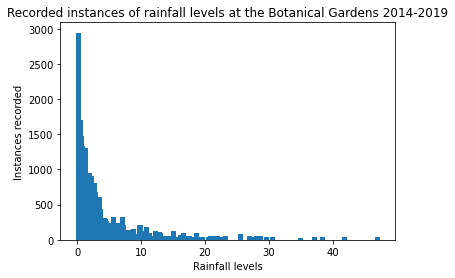

In [66]:
x_axis = dropped_zero_rainfall_days2["Rainfall Levels"]
# x_axis = hitandrun_yes["Daily_Rainfall"].astype("float")
y_axis = dropped_zero_rainfall_days2["Instances Recorded"]

plt.bar (x_axis,y_axis)
plt.title("Recorded instances of rainfall levels at the Botanical Gardens 2014-2019")
plt.xlabel("Rainfall levels")
plt.ylabel("Instances recorded")

plt.show()

In [38]:
##Find how many hit-and-runs per rainfall level

narrowed_data = crash_df.loc[:,["Daily_Rainfall","hit_run_flag"]]
# narrowed_data["hit_run_flag"].value_counts()
# narrowed_data["Daily_Rainfall"].value_counts()

narrowed_data

,Daily_Rainfall,hit_run_flag
0,0.6,No
1,0.0,No
2,0.0,No
3,0.0,Yes
4,0.0,No
...,...,...
77508,0.0,No
77509,0.0,No
77510,0.0,No
77511,0.0,No


In [40]:
##first by finding 'yes's...
hitandrun_yes = narrowed_data.loc[narrowed_data["hit_run_flag"]=="Yes"].sort_values(by="Daily_Rainfall",ascending=True)
hitandrun_yes

,Daily_Rainfall,hit_run_flag
3,0.0,Yes
48179,0.0,Yes
48180,0.0,Yes
48195,0.0,Yes
48206,0.0,Yes
...,...,...
75631,41.8,Yes
75646,41.8,Yes
75633,41.8,Yes
48624,47.0,Yes


In [41]:
counts = hitandrun_yes["Daily_Rainfall"].value_counts()
# floats = counts.astype("float")
yes_with_index = counts.reset_index()

# floats
yes_with_index

,index,Daily_Rainfall
0,0.0,2861
1,0.2,165
2,0.4,89
3,0.6,79
4,0.8,77
...,...,...
108,2.3,1
109,11.6,1
110,37.2,1
111,17.4,1


In [42]:
yes_with_index.sum()

index             1349.6
Daily_Rainfall    4317.0
dtype: float64

In [43]:
counts_of_yes = yes_with_index.rename(columns={"index":"Daily Rainfall","Daily_Rainfall":"Counts of 'Yes'"})
dropped_zero_rainfall_days = counts_of_yes.drop([0,0])
ascending = dropped_zero_rainfall_days.sort_values(by="Daily Rainfall",ascending=True)
ascending.head(50)


,Daily Rainfall,Counts of 'Yes'
28,0.1,11
1,0.2,165
95,0.3,2
2,0.4,89
3,0.6,79
4,0.8,77
8,1.0,53
86,1.1,2
6,1.2,59
13,1.4,38


In [44]:
ascending.sum()

Daily Rainfall     1349.6
Counts of 'Yes'    1456.0
dtype: float64

The r-squared is: 0.19019215471203796


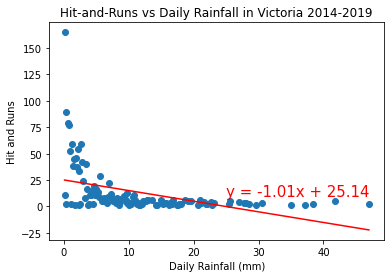

In [67]:
##plot instances of hit and runs per rainfall level and find line of regression

x_axis2 = ascending["Daily Rainfall"]
# x_axis = hitandrun_yes["Daily_Rainfall"].astype("float")
y_axis2 = ascending["Counts of 'Yes'"]

plt.scatter(x_axis2,y_axis2)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis2, y_axis2)
regress_values = x_axis2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(25,10),fontsize=15,color="red")

plt.plot(x_axis2,regress_values,"r-")
print(f"The r-squared is: {rvalue**2}")

plt.title("Hit-and-Runs vs Daily Rainfall in Victoria 2014-2019")
plt.xlabel("Daily Rainfall (mm)")
plt.ylabel("Hit and Runs")

plt.show()

In [46]:
x_axis2
#daily rainfall levels

28      0.1
1       0.2
95      0.3
2       0.4
3       0.6
       ... 
112    35.0
110    37.2
92     38.4
58     41.8
88     47.0
Name: Daily Rainfall, Length: 112, dtype: float64

In [47]:
y_axis2
#"yes" responses

28      11
1      165
95       2
2       89
3       79
      ... 
112      1
110      1
92       2
58       5
88       2
Name: Counts of 'Yes', Length: 112, dtype: int64

In [48]:
##find how many crashes at dead-ends in Victoria are related to alcohol consumption

narrowed_data1 = crash_df.loc[crash_df["road_geometry"]=="Dead end"]
narrowed_again = narrowed_data1.loc[:,["road_geometry","alcohol_related"]]
numbers = narrowed_again.value_counts("alcohol_related")
numbers

alcohol_related
No     97
Yes     8
dtype: int64

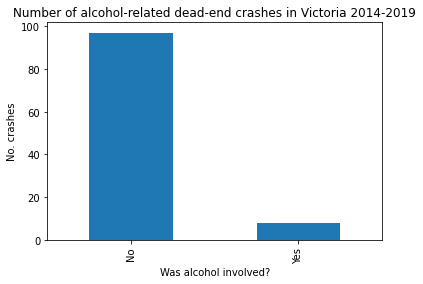

In [49]:
numbers.plot.bar()

plt.title("Number of alcohol-related dead-end crashes in Victoria 2014-2019")
plt.xlabel("Was alcohol involved?")
plt.ylabel("No. crashes")

plt.show()

In [58]:
##compare percentages of dead-end crashes under the influence of alcohol vs. not under the influence of alcohol

narrowed_alcohol = crash_df.loc[:,["road_geometry","alcohol_related"]]
yes_alcohol = narrowed_alcohol.loc[narrowed_alcohol["alcohol_related"]=="Yes"]
by_rg = yes_alcohol.groupby("road_geometry")
road_geometry_alcohol = by_rg.count().sort_values(by="alcohol_related",ascending=False)

road_geometry_alcohol2 = road_geometry_alcohol.reset_index()
road_geometry_alcohol2

,road_geometry,alcohol_related
0,Not at intersection,1705
1,T intersection,422
2,Cross intersection,237
3,Multiple intersection,24
4,Private property,21
5,Dead end,8
6,Y intersection,6
7,Unknown,4


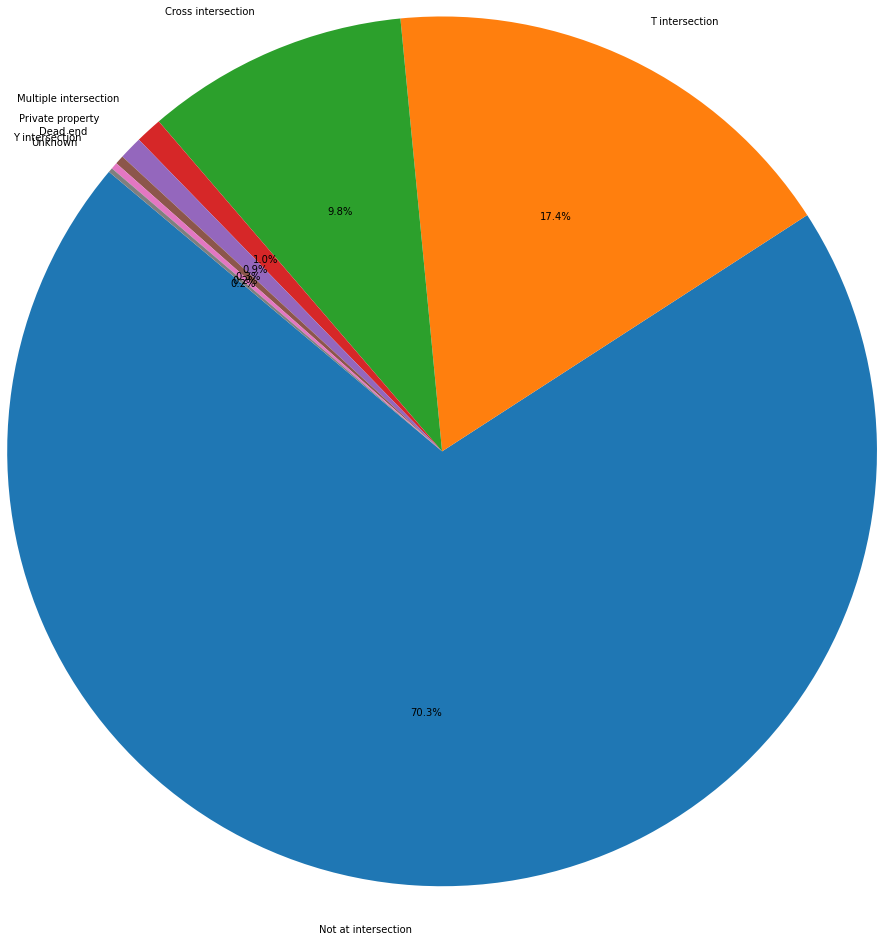

In [76]:
labels=road_geometry_alcohol2["road_geometry"]
values=road_geometry_alcohol2["alcohol_related"]

plt.pie(values, labels=labels,
        autopct="%1.1f%%", startangle=140,radius=5)

plt.show()

In [24]:
road_geometry_alcohol.loc["Dead end"]/2427*100

alcohol_related    0.329625
Name: Dead end, dtype: float64

In [25]:
print(road_geometry_alcohol.sum())

alcohol_related    2427
dtype: int64


In [63]:
narrowed_alcohol = crash_df.loc[:,["road_geometry","alcohol_related"]]
no_alcohol = narrowed_alcohol.loc[narrowed_alcohol["alcohol_related"]=="No"]
by_rg2 = no_alcohol.groupby("road_geometry")
road_geometry_no_alcohol = by_rg2.count().sort_values(by="alcohol_related",ascending=False)

road_geometry_no_alcohol2=road_geometry_no_alcohol.reset_index()
road_geometry_no_alcohol2

,road_geometry,alcohol_related
0,Not at intersection,38450
1,T intersection,15943
2,Cross intersection,15709
3,Unknown,1855
4,Multiple intersection,1505
5,Private property,1367
6,Y intersection,155
7,Dead end,97
8,Road closure,4


In [27]:
print(road_geometry_no_alcohol.sum())

alcohol_related    75085
dtype: int64


In [78]:
road_geometry_no_alcohol.loc["Dead end"]/75085*100

alcohol_related    0.129187
Name: Dead end, dtype: float64

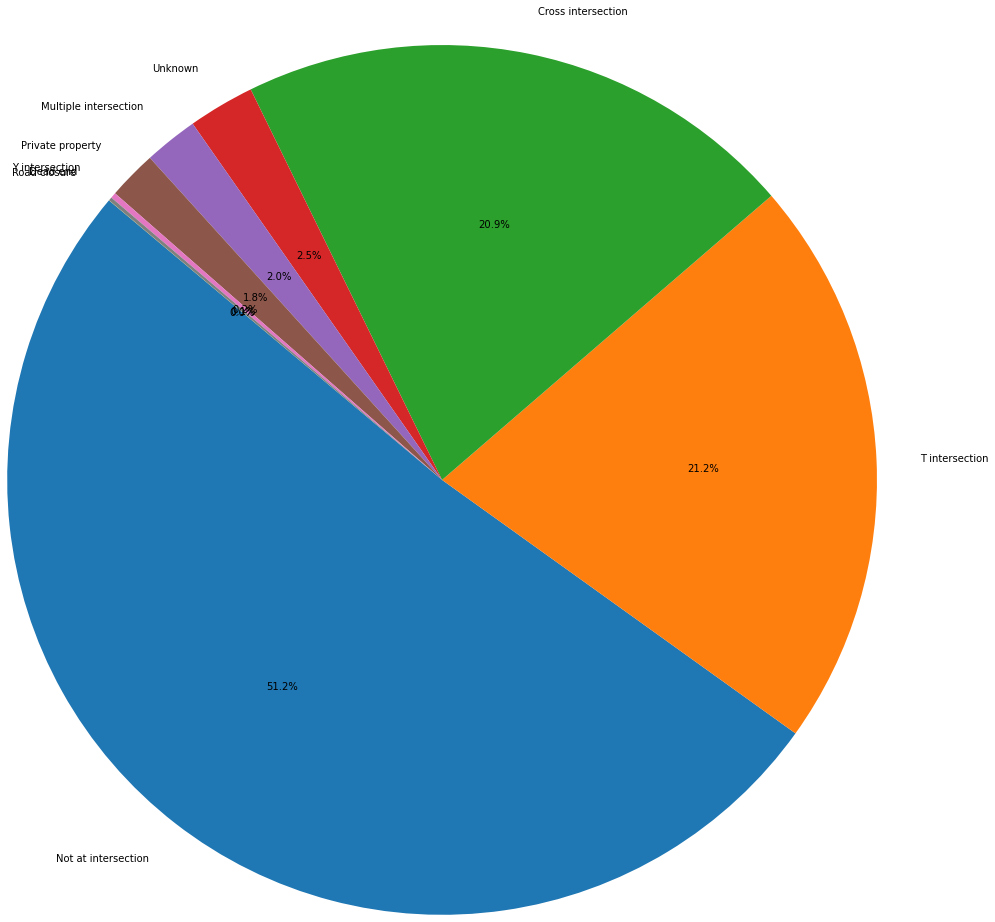

In [77]:
labels2=road_geometry_no_alcohol2["road_geometry"]
values2=road_geometry_no_alcohol2["alcohol_related"]

plt.pie(values2, labels=labels2,
        autopct="%1.1f%%", startangle=140,radius=5)

plt.show()

In [ ]:
#=========================== End Kaayin's Part ===========================